___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Exploratory Data Analysis Project (Part - 2) - Session - 6

<blockquote style="background: #f9f9f9;padding: 0.5em 10px;" class="">
<img src="https://docs.google.com/uc?id=1FOcuE9AkAqc0JU6dUly-cuoUg3bOp92H" class="img-fluid" width="200" height="85"> <h1>EDA for Car Price Prediction Model</h1>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [2]:
oto1 = pd.read_csv("scout_car_precleaned.csv")

In [3]:
oto1.shape

(15919, 121)

In [4]:
oto1.head()

,make_model,body_type,price,vat,km,type,upholstery,cylinders,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,"Cloth, Black",3.00,nan,2,1,2021-06-01,Metallic,NaN,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,99.00,1422.00,Euro 6,4.00,Diesel,5.00,5.00,66
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,"Cloth, Grey",4.00,7.00,1,0,NaN,NaN,NaN,4 (Green),1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,129.00,1798.00,Euro 6,3.00,Benzine,3.00,4.00,141
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,"Cloth, Black",nan,nan,1,0,NaN,Metallic,NaN,4 (Green),1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,99.00,1598.00,Euro 6,4.00,Diesel,4.00,4.00,85
3,Audi A1,Sedans,14500,NaN,73000.00,Used,NaN,3.00,6.00,1,0,NaN,Metallic,NaN,NaN,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,NaN,Brown,99.00,1422.00,Euro 6,4.00,Diesel,3.00,4.00,66
4,Audi A1,Sedans,16790,NaN,16200.00,Used,"Cloth, Black",3.00,nan,1,1,NaN,Metallic,Germany,NaN,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.10,Automatic,front,Black,109.00,1422.00,Euro 6,4.00,D

### Let's take a look at the columns which have any missing values.

In [5]:
miss_val = []

[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]

miss_val

['vat',
 'km',
 'type',
 'upholstery',
 'cylinders',
 'gears',
 'next_inspection',
 'paint_type',
 'country',
 'emission_label',
 'consumption_comb',
 'drive_chain',
 'displacement_cc',
 'emission_class',
 'register_age',
 'nr_doors',
 'nr_seats']

## Handling with Missing Values & Outliers

- **In some cases, We will use again `fill_most` function that we defined previusly.**

In [6]:
def fill_most(group_col, col_name): 
    """
This function fills the missing values with the most frequent values groupby column 'group_col'.
For example : based on 'make_model' column, the function fill using .mode(), the most frequent value of variables.
     """
    for group in list(oto1[group_col].unique()):
        grp_inx=list(oto1[oto1[group_col]==group][col_name].index)
        oto1[col_name].iloc[grp_inx]=oto1[col_name].iloc[grp_inx].fillna(oto1[oto1[group_col]==group][col_name].mode()[0])

***

### ``"body_type"``

In [7]:
oto1.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [8]:
oto1.body_type[oto1.body_type == "Other"] = np.nan
fill_most("make_model", "body_type")

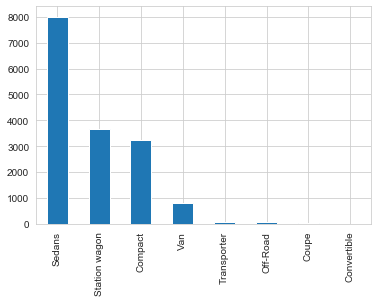

In [9]:
oto1.body_type.value_counts(dropna = False).plot(kind = "bar")

***

### ``"cylinders"``

- We have to make a conclusion if we should drop it. First we will fill missing values than make a decision.

In [10]:
oto1.cylinders.value_counts(dropna=False)

4.00    8105
nan     5680
3.00    2104
5.00      22
6.00       3
2.00       2
8.00       2
1.00       1
Name: cylinders, dtype: int64

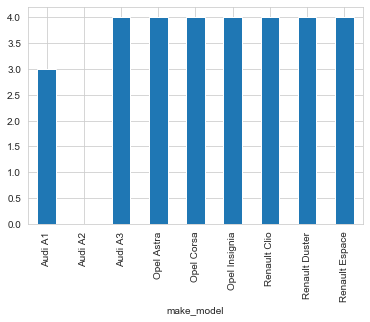

In [11]:
oto1.groupby('make_model')['cylinders'].median().plot(kind = "bar")

In [12]:
# It produce the same length as it is.

oto1.groupby('make_model')['cylinders'].transform('median')

0       3.00
1       3.00
2       3.00
3       3.00
4       3.00
        ... 
15914   4.00
15915   4.00
15916   4.00
15917   4.00
15918   4.00
Name: cylinders, Length: 15919, dtype: float64

In [13]:
test1 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))
test2 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].median())

In [14]:
test1.value_counts(dropna = False)

4.00    12925
3.00     2963
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
nan         1
Name: cylinders, dtype: int64

In [15]:
test2.value_counts(dropna = False)

4.00    8105
nan     5680
3.00    2104
5.00      22
6.00       3
2.00       2
8.00       2
1.00       1
Name: cylinders, dtype: int64

In [16]:
oto1['cylinders'] = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))

In [17]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2963
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
nan         1
Name: cylinders, dtype: int64

In [18]:
# Audi A-2 has no value. So this nan is belong to A-2. We can google it, in order to learn how many cylinders does it have?

oto1.cylinders.fillna(3, inplace=True)

In [19]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2964
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
Name: cylinders, dtype: int64

In [20]:
oto1.drop("cylinders", axis = 1, inplace = True)

***

### ``"gears"``

In [21]:
oto1.gears.value_counts(dropna = False)

6.00    5822
nan     4712
5.00    3240
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
Name: gears, dtype: int64

In [22]:
oto1["gears"] = oto1["gears"].fillna(oto1.groupby("make_model")["gears"].transform("median"))

In [23]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4412
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
nan        1
Name: gears, dtype: int64

In [24]:
oto1.groupby("make_model")["gears"].median()

make_model
Audi A1          6.00
Audi A2           nan
Audi A3          6.00
Opel Astra       6.00
Opel Corsa       5.00
Opel Insignia    6.00
Renault Clio     5.00
Renault Duster   6.00
Renault Espace   6.00
Name: gears, dtype: float64

In [25]:
oto1.gears.fillna(5, inplace = True)

In [26]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4413
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
Name: gears, dtype: int64

### Handling with outliers

- Althoug it is somehow a categorical variable, we should clear it in terms of outliers.
- If we take a look at the Renault "Espace 2018-2019 Automatic gearbox"  (age of 1 year), 
- We can see that there is no gear number in the [AutoScout24](https://www.autoscout24.com/lst/renault/espace?sort=standard&desc=0&gear=A%2CS&ustate=N%2CU&size=20&page=1&fregfrom=2019&atype=C&) web page. But there is an [evidence](https://www.youtube.com/watch?v=4gUwDSyv9r8) that it is 7

In [27]:
oto1[oto1["gears"] == 4]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15822,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15823,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165


In [28]:
oto1.gears.iloc[15822] = 7
oto1.gears.iloc[15823] = 7

In [29]:
oto1[oto1["gears"] == 3]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15817,Renault Espace,Van,54204,VAT deductible,11.00,New,Part leather,3.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.40,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,nan,146
15845,Renault Espace,Van,46660,VAT deductible,11.00,New,Part leather,3.00,1,0,NaN,NaN,Netherlands,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.10,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,nan,118


In [30]:
oto1.gears.iloc[15817] = 7
oto1.gears.iloc[15845] = 7

In [31]:
oto1[oto1["gears"] == 1]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
8921,Opel Corsa,Compact,11000,VAT deductible,24000.00,Used,"Cloth, Black",1.00,1,0,NaN,Metallic,Belgium,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,4.80,Semi-automatic,front,Blue,112.00,1398.00,Euro 6,2.00,Benzine,5.00,5.00,66
14375,Renault Clio,Compact,23990,NaN,10.00,Demonstration,NaN,1.00,1,0,NaN,NaN,Austria,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,nan,Automatic,NaN,White,116.00,1618.00,NaN,2.00,Benzine,4.00,nan,147


In [32]:
oto1.gears.iloc[8921] = 5
oto1.gears.iloc[14375] = 6

In [33]:
oto1[oto1['gears'] == 2]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
9812,Opel Corsa,Sedans,9880,VAT deductible,19247.00,Used,"Cloth, Black",2.00,1,0,NaN,Metallic,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,nan,Manual,NaN,Grey,116.00,1229.00,Euro 6,2.00,Benzine,5.00,nan,51


In [34]:
oto1.gears.iloc[9812] = 5

In [35]:
oto1[oto1['gears'] == 9]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15812,Renault Espace,Van,54982,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,White,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15814,Renault Espace,Van,54982,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,White,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15824,Renault Espace,Van,52711,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.40,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15827,Renault Espace,Van,52711,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.40,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15869,Renault Espace,Van,49100,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,NaN,Netherlands,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.30,Automatic,NaN,White,116.00,1997.00,

In [36]:
indx_list = list(oto1[oto1["gears"] == 9].index)

In [37]:
indx_list

[15812, 15814, 15824, 15827, 15869, 15876]

In [38]:
for indx in indx_list:
    oto1.gears.iloc[indx] = 7

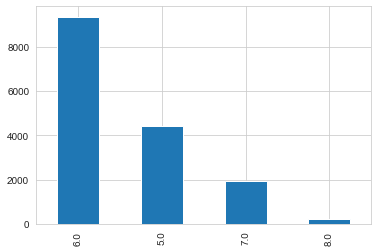

In [39]:
oto1.gears.value_counts(dropna = False).plot(kind = "bar")

- It contains numerical values, we can either consider it as categorical or continuous. When we implement ``get_dummies()``, we'll see the result.

***

### ``"type"``

In [40]:
oto1.type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [41]:
oto1.iloc[list(oto1.loc[oto1.type.isnull(), 'type'].index)]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
2765,Audi A3,Sedans,17900,NaN,115137.00,NaN,"Cloth, Other",6.00,2,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,4.50,Automatic,front,White,118.00,1968.00,Euro 6,4.00,Diesel,5.00,5.00,110
5237,Audi A3,Sedans,25400,NaN,nan,NaN,"Cloth, Other",7.00,1,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,3.90,Automatic,front,Grey,103.00,1598.00,Euro 6,nan,Diesel,5.00,5.00,85


In [42]:
oto1.type.fillna("Used", inplace = True)

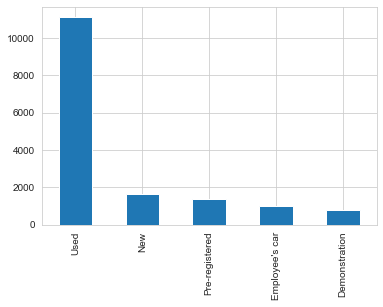

In [43]:
oto1.type.value_counts(dropna = False).plot(kind = "bar")

- `type` variable should be considered as categorical and should be implemented ``get_dummies()`` in the end.

***

### ``"upholstery"``

In [44]:
oto1.upholstery.value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Full leather, Brown     116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Cloth, White              8
Velour, Grey              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Beige                     3
Part leather, Red   

In [45]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts(dropna = False)

False    9634
NaN      3720
True     2565
Name: upholstery, dtype: int64

In [46]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts().sum()

12199

In [47]:
9634 / 12199  # cloth

0.7897368636773506

In [48]:
3720 * 0.7897368636773506

2937.8211328797443

- We can fill 2900 ``nan`` values with ``"cloth"`` and 820 ``nan`` values with ``"leather"``

In [49]:
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 900, inplace = True)

In [50]:
upholstery_bool_list = oto1['upholstery'].str.contains('leather|alcantara', case = False, regex = True)

In [51]:
oto1.loc[upholstery_bool_list, "upholstery"] = "Part/Full Leather"

In [52]:
oto1.upholstery.loc[lambda x : x!= "Part/Full Leather"] = "Cloth"

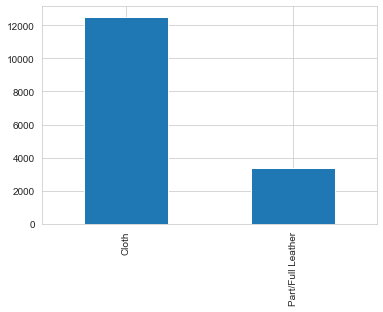

In [53]:
oto1.upholstery.value_counts(dropna = False).plot(kind = "bar")

- `upholstery` is a categorical variable and should be implemented ``get_dummies()`` in the end.

***

### ``"register_age"``

In [54]:
oto1.register_age.value_counts(dropna = False)

2.00    4522
4.00    3674
3.00    3273
1.00    2853
nan     1597
Name: register_age, dtype: int64

In [55]:
oto1[oto1.register_age.isnull()]["km"].value_counts(dropna = False)

nan         838
10.00       369
1.00        146
5.00         58
20.00        32
15.00        21
0.00         19
11.00        12
8.00         11
50.00        10
12.00         8
100.00        8
7.00          7
9.00          4
3.00          4
4.00          3
30.00         3
25.00         3
250.00        3
3000.00       2
39962.00      2
2.00          2
22627.00      2
60.00         1
6.00          1
784.00        1
196.00        1
40.00         1
6100.00       1
85000.00      1
281.00        1
11200.00      1
11000.00      1
19500.00      1
325.00        1
5000.00       1
81800.00      1
68485.00      1
99.00         1
77.00         1
500.00        1
150.00        1
142.00        1
20768.00      1
89982.00      1
89692.00      1
32084.00      1
497.00        1
141.00        1
4500.00       1
3500.00       1
34164.00      1
4307.00       1
Name: km, dtype: int64

In [56]:
oto1[oto1.register_age.isnull()]["km"].mean()

934.4967061923584

In [57]:
oto1[oto1.register_age.isnull()]["km"].median()

10.0

- We can conclude that ``NaN`` values can be filled with ``0`` year

In [58]:
oto1.register_age.fillna(0, inplace = True)

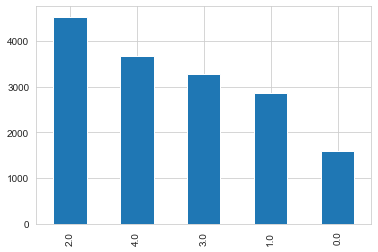

In [59]:
oto1.register_age.value_counts(dropna = False).plot(kind = "bar")

- It contains numerical values, we can either consider it as categorical or continuous. When we implement ``get_dummies()``, we'll see the result.

***

### ``"km"``

In [60]:
oto1.km.value_counts(dropna = False)

10.00       1045
nan         1024
1.00         367
5.00         170
50.00        148
            ... 
8329.00        1
267.00         1
1060.00        1
73652.00       1
49320.00       1
Name: km, Length: 6690, dtype: int64

In [61]:
oto1.groupby("register_age")["km"].transform("mean")

0       77442.52
1       41754.94
2       77442.52
3       77442.52
4       77442.52
          ...   
15914     934.50
15915    2085.36
15916    2085.36
15917    2085.36
15918    2085.36
Name: km, Length: 15919, dtype: float64

In [62]:
oto1['km'] = oto1['km'].fillna(oto1.groupby('register_age')['km'].transform('mean'))

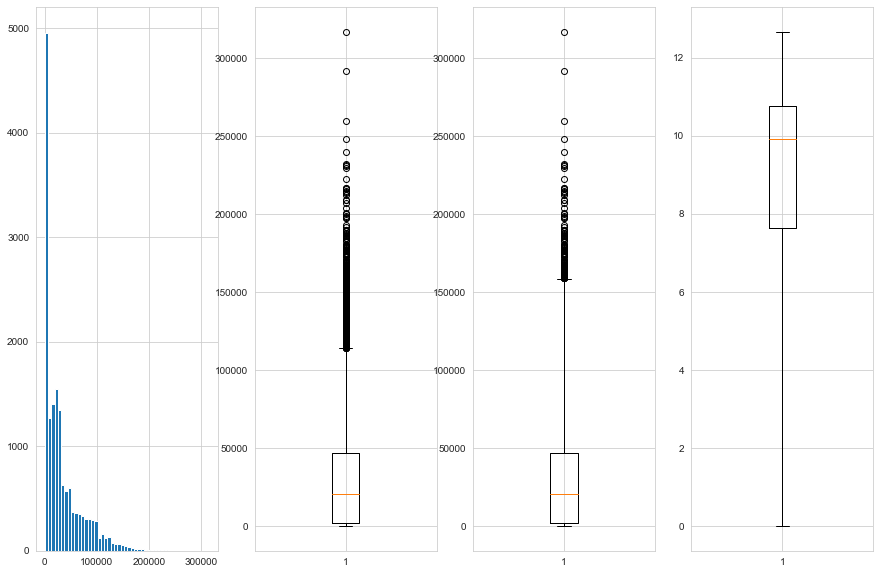

In [63]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(oto1.km, bins = 50)

plt.subplot(142)
plt.boxplot(oto1.km)

plt.subplot(143)
plt.boxplot(oto1.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(oto1.km), whis = 2.5)
plt.show()

In [64]:
#oto1["km_logged"] = np.log(oto1.km)

In [65]:
oto1.km.sort_values(ascending = False).head()

9279    317000.00
3003    291800.00
5712    260000.00
6224    248000.00
15277   240000.00
Name: km, dtype: float64

- `km` is a variable with a wide range of values. We can not consider the outlier values above as a real outliers. So let's keep it as it is.

***

### ``"vat"``

In [66]:
oto1.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

- We can fill missing values of the most repetitive.

In [67]:
oto1.vat.fillna(method = "ffill", inplace = True)

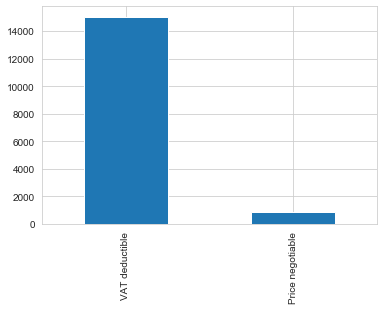

In [68]:
oto1.vat.value_counts(dropna = False).plot(kind = "bar")

- `vat` is a categorical variable and should be implemented `get_dummies()`

***

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Exploratory Data Analysis Project (Part - 2) - Session - 7

<blockquote style="background: #f9f9f9;padding: 0.5em 10px;" class="">
<img src="https://docs.google.com/uc?id=1FOcuE9AkAqc0JU6dUly-cuoUg3bOp92H" class="img-fluid" width="200" height="85"> <h1>EDA for Car Price Prediction Model</h1>
</blockquote>

### next_inspection

In [69]:
oto1.next_inspection.value_counts(dropna = False)

NaN           12384
2021-06-01      471
2021-03-01      210
2021-05-01      180
2021-04-01      171
              ...  
2022-12-01        1
2018-01-01        1
1921-01-01        1
1955-01-01        1
2017-12-01        1
Name: next_inspection, Length: 78, dtype: int64

In [70]:
oto1.drop("next_inspection", axis = 1, inplace = True)

***

### ``"paint_type"``

In [71]:
oto1.paint_type.value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [72]:
oto1.drop("paint_type", axis = 1, inplace = True)

***

### ``"country"``

In [73]:
oto1.country.value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Bulgaria             2
Romania              2
Slovenia             1
Switzerland          1
Luxembourg           1
Serbia               1
Egypt                1
Name: country, dtype: int64

In [74]:
oto1.drop("country", axis = 1, inplace = True)

***

### ``"emission_label"``

In [75]:
oto1.emission_label.value_counts(dropna = False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [76]:
oto1.drop("emission_label", axis = 1, inplace = True)

***

### ``"consumption_comb"``

In [77]:
oto1.consumption_comb.value_counts(dropna = False)

nan     1925
5.40     770
3.90     733
4.00     717
5.10     657
        ... 
7.30       2
9.10       1
1.20       1
4.55       1
7.50       1
Name: consumption_comb, Length: 65, dtype: int64

### Handling with outliers
- The domain (car trading) knowledge is important.
- We can see that it seems, ``consumption_comb`` values of ``0``, ``1``, ``1.2`` and ``1.6`` are meaningless.
- So, we can convert them into `NaN`s and then we can fill them.
- Let's go step by step

In [79]:
oto1.consumption_comb.sort_values().head(55).unique()

array([0. , 1. , 1.2, 1.6, 3. ])

In [80]:
oto1.consumption_comb.sort_values().tail(55).unique()

array([nan])

In [81]:
consumption_outlier = oto1.consumption_comb.isin([0.00, 1.00, 1.20, 1.60])

In [82]:
consumption_outlier.value_counts()

False    15876
True        43
Name: consumption_comb, dtype: int64

In [83]:
oto1.loc[consumption_outlier, "consumption_comb"] = np.nan

In [84]:
oto1.groupby("make_model")["consumption_comb"].mean()

make_model
Audi A1          4.37
Audi A2          4.90
Audi A3          4.33
Opel Astra       4.71
Opel Corsa       5.50
Opel Insignia    5.38
Renault Clio     4.71
Renault Duster    nan
Renault Espace   5.40
Name: consumption_comb, dtype: float64

In [87]:
oto1.groupby("make_model")["consumption_comb"].median()

make_model
Audi A1          4.40
Audi A2          4.90
Audi A3          4.10
Opel Astra       4.60
Opel Corsa       5.40
Opel Insignia    5.50
Renault Clio     5.00
Renault Duster    nan
Renault Espace   4.70
Name: consumption_comb, dtype: float64

In [86]:
oto1[oto1["make_model"] == "Renault Duster"].shape[0]

34

In [88]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1.groupby("make_model")["consumption_comb"].transform("mean"))

In [89]:
oto1.consumption_comb.isnull().sum()

34

In [90]:
oto1["consumption_comb"].mean()

4.843707403948365

In [91]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1["consumption_comb"].mean())

In [92]:
oto1.consumption_comb.isnull().sum()

0

In [93]:
oto1.consumption_comb.sort_values().tail(44)

8319    7.80
8326    7.80
11432   7.80
8268    7.80
8321    7.80
8270    7.80
11219   7.90
12620   7.90
11221   7.90
10548   8.00
10571   8.00
12654   8.00
10744   8.00
10507   8.00
3609    8.10
3608    8.10
10515   8.30
3600    8.30
3599    8.30
3598    8.30
5161    8.30
3590    8.30
3587    8.30
3601    8.30
3596    8.30
3604    8.30
3603    8.30
3592    8.30
3649    8.30
3605    8.30
3606    8.30
3610    8.30
3593    8.30
3648    8.30
3602    8.30
3595    8.30
12422   8.60
12530   8.60
12553   8.60
10789   8.60
10817   8.70
12529   8.70
12054   8.70
10771   9.10
Name: consumption_comb, dtype: float64

- Using our domain knowledge we can conclude that min value of ``3`` and max value of ``9.10`` are normal. But anyways, let's analyze outliers with plotting, np.log and winsorize methods.

In [94]:
oto1.consumption_comb.describe()

count   15919.00
mean        4.84
std         0.86
min         3.00
25%         4.20
50%         4.80
75%         5.40
max         9.10
Name: consumption_comb, dtype: float64

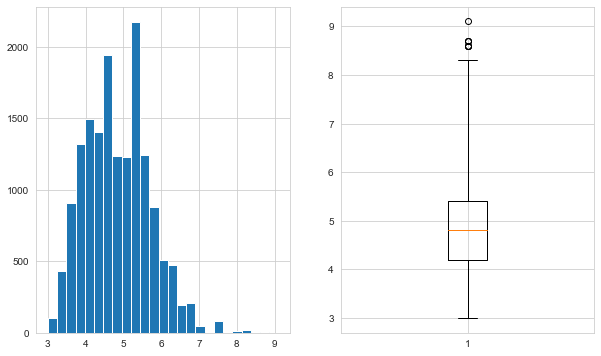

In [95]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(oto1.consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(oto1.consumption_comb, whis = 2.5)

plt.show()

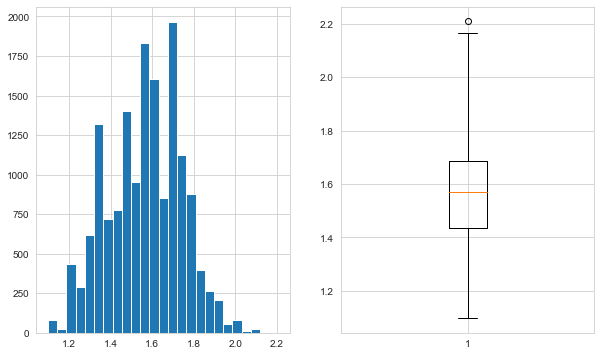

In [97]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(oto1.consumption_comb), bins=25)

plt.subplot(122)
plt.boxplot(np.log(oto1.consumption_comb), whis = 2)

plt.show()

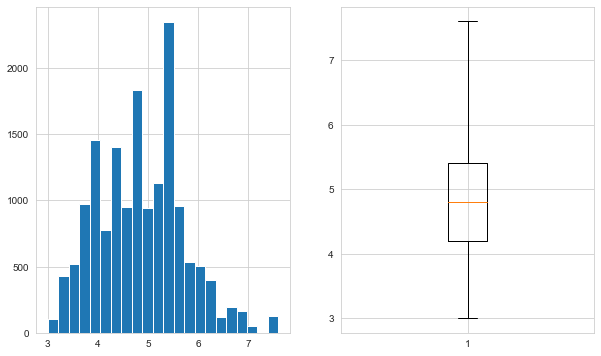

In [98]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(winsorize(oto1.consumption_comb, (0.003)), bins=22)

plt.subplot(122)
plt.boxplot(winsorize(oto1.consumption_comb, (0.003)), whis = 2)

plt.show()

***

### ``"drive_chain"``

In [99]:
oto1.drive_chain.value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [100]:
fill_most("make_model", "drive_chain")

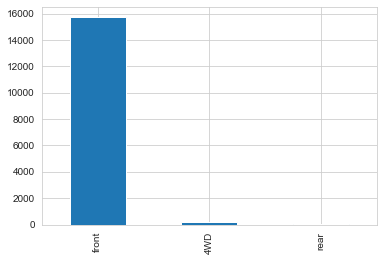

In [101]:
oto1.drive_chain.value_counts(dropna=False).plot(kind = "bar")

- `drive_chain` is a categorical variable and should be implemented `get_dummies()`

***

### displacement_cc

In [102]:
oto1.displacement_cc.value_counts(dropna = False)

1598.00    4761
999.00     2438
1398.00    1314
1399.00     749
1229.00     677
           ... 
2967.00       1
1390.00       1
140.00        1
1350.00       1
1198.00       1
Name: displacement_cc, Length: 78, dtype: int64

In [103]:
oto1.displacement_cc.isin([np.nan]).value_counts(dropna = False)

False    15423
True       496
Name: displacement_cc, dtype: int64

In [104]:
fill_most("make_model", "displacement_cc")

In [105]:
oto1.displacement_cc.isnull().sum()

0

In [106]:
oto1.displacement_cc.describe()

count   15919.00
mean     1426.17
std       329.68
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: displacement_cc, dtype: float64

In [108]:
oto1.sort_values(by = ["displacement_cc"], ascending = False)["displacement_cc"].head(45)

10932   16000.00
7169    15898.00
10771    2967.00
3592     2480.00
3609     2480.00
3608     2480.00
3606     2480.00
3605     2480.00
3603     2480.00
3648     2480.00
3602     2480.00
3601     2480.00
3610     2480.00
3604     2480.00
3649     2480.00
3590     2480.00
3600     2480.00
3599     2480.00
3598     2480.00
3593     2480.00
3595     2480.00
3587     2480.00
3596     2480.00
11978    2000.00
11988    2000.00
2903     2000.00
12520    2000.00
12519    2000.00
12503    2000.00
12181    2000.00
12938    2000.00
12414    2000.00
12518    2000.00
11977    2000.00
11800    2000.00
12226    2000.00
12945    2000.00
12179    2000.00
12170    2000.00
12521    2000.00
11234    2000.00
10556    2000.00
13027    2000.00
13029    2000.00
13050    2000.00
Name: displacement_cc, dtype: float64

In [110]:
oto1.sort_values(by=['displacement_cc'])["displacement_cc"].head(55) 

14315     1.00
12800     1.00
12798     1.00
12796     1.00
12484     1.00
12790     1.00
12786     1.00
12783     1.00
14327     1.00
12781     1.00
14326     1.00
14325     1.00
12769     1.00
12815     1.00
14324     1.00
12768     1.00
12750     1.00
14322     1.00
14321     1.00
12670     1.00
12604     1.00
14320     1.00
12467     1.00
12473     1.00
12554     1.00
12501     1.00
12499     1.00
14319     1.00
12823     1.00
14328     1.00
12849     1.00
13904     1.00
12848     1.00
12835     1.00
14314     1.00
14284     1.00
14198     2.00
10559     2.00
13912    54.00
10194   122.00
7812    139.00
7811    139.00
7810    139.00
7809    139.00
8128    140.00
15578   160.00
15579   160.00
15574   160.00
15575   160.00
15576   160.00
15577   160.00
13653   890.00
14702   898.00
14726   898.00
14703   898.00
Name: displacement_cc, dtype: float64

- The ``displacement_cc`` can't be `16000`, `15898`, `1`, `2`, `54`, `122`, `139`, `140` or `160`

In [113]:
outlier_bool_list = oto1.displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [114]:
oto1.loc[outlier_bool_list, "displacement_cc"] = np.nan

In [115]:
fill_most("make_model", "displacement_cc")

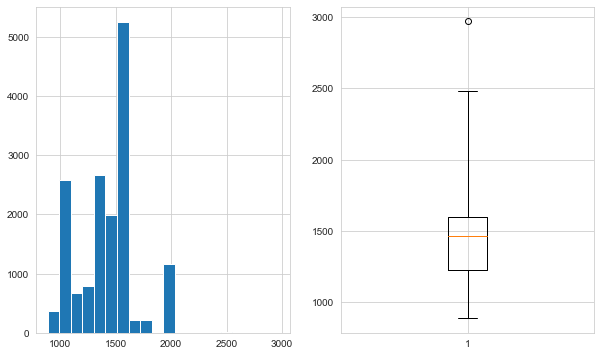

In [116]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(oto1.displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(oto1.displacement_cc, whis = 2.5)

plt.show()

- There is no problem in terms of outliers

***

### `"emission_class"`

In [117]:
oto1.emission_class.value_counts(dropna = False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

In [118]:
oto1.drop("emission_class", axis = 1, inplace = True)

***

### `"nr_doors"`

In [119]:
oto1.nr_doors.value_counts(dropna = False)

5.00    11575
4.00     3079
3.00      832
2.00      219
nan       212
7.00        1
1.00        1
Name: nr_doors, dtype: int64

In [120]:
fill_most("make_model", "nr_doors")

In [121]:
oto1.nr_doors.value_counts(dropna = False)

5.00    11787
4.00     3079
3.00      832
2.00      219
7.00        1
1.00        1
Name: nr_doors, dtype: int64

In [122]:
oto1[oto1['nr_doors'] == 7.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15202,Renault Espace,Van,21600,Price negotiable,78000.00,Used,Part/Full Leather,6.00,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,4.60,Automatic,front,Brown,120.00,1598.00,4.00,Diesel,7.00,nan,118


In [123]:
oto1.nr_doors.iloc[15202] = 5

In [124]:
oto1[oto1['nr_doors']==1.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
13782,Renault Clio,Compact,8500,VAT deductible,41493.00,Used,Cloth,5.00,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,4.71,Manual,front,White,116.00,1461.00,4.00,Diesel,1.00,nan,55


In [125]:
oto1.nr_doors.iloc[13782] = 5

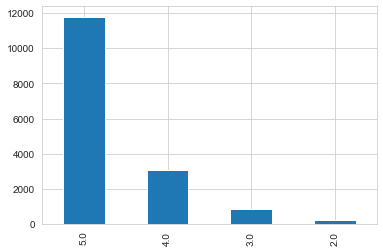

In [126]:
oto1.nr_doors.value_counts(dropna = False).plot(kind = "bar")

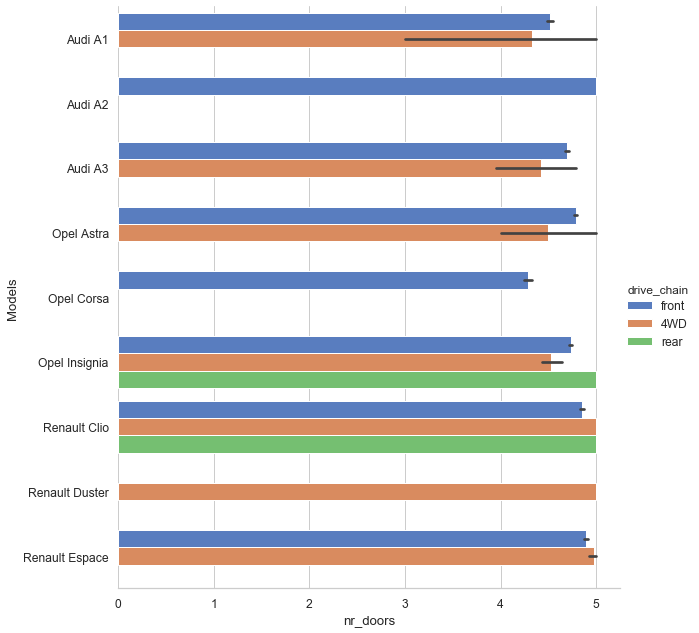

In [127]:
sns.set(style = "whitegrid", font_scale = 1.1)

g = sns.catplot(x = "nr_doors", y = "make_model", hue = "drive_chain", data = oto1,
               height = 9, kind = "bar", palette = "muted")

g.despine(left = True)
g.set_ylabels("Models")

***

### ``"nr_seats"``

In [128]:
oto1.nr_seats.value_counts(dropna = False)

5.00    13336
4.00     1125
nan       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: nr_seats, dtype: int64

In [129]:
fill_most("make_model", "nr_seats")

In [130]:
oto1.nr_seats.value_counts(dropna=False)

5.00    14313
4.00     1125
7.00      362
2.00      116
6.00        2
3.00        1
Name: nr_seats, dtype: int64

In [131]:
oto1[oto1['nr_seats'] == 6.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
582,Audi A1,Compact,13500,VAT deductible,100000.00,Used,Cloth,5.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.37,Manual,front,White,116.00,1000.00,3.00,Benzine,5.00,6.00,70
15890,Renault Espace,Station wagon,42490,VAT deductible,934.50,New,Cloth,6.00,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0,5.70,Automatic,front,Black,168.00,1997.00,0.00,Diesel,5.00,6.00,147


In [132]:
oto1.nr_seats.iloc[582] = 5
oto1.nr_seats.iloc[15890] = 5

In [133]:
oto1[oto1['nr_seats'] == 3.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
1636,Audi A1,Compact,23090,VAT deductible,9821.00,Used,Part/Full Leather,7.00,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.80,Automatic,front,Black,134.00,1798.00,2.00,Benzine,2.00,3.00,141


In [134]:
oto1.nr_seats.iloc[1636] = 5

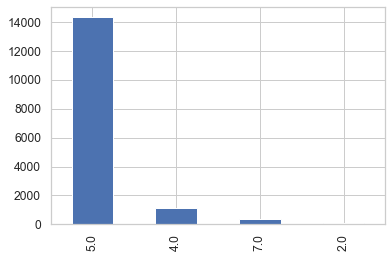

In [135]:
oto1.nr_seats.value_counts(dropna = False).plot(kind = "bar")

***

### fuel_new

In [136]:
oto1.fuel_new.value_counts(dropna = False)

Benzine    8550
Diesel     7299
LPG/CNG      70
Name: fuel_new, dtype: int64

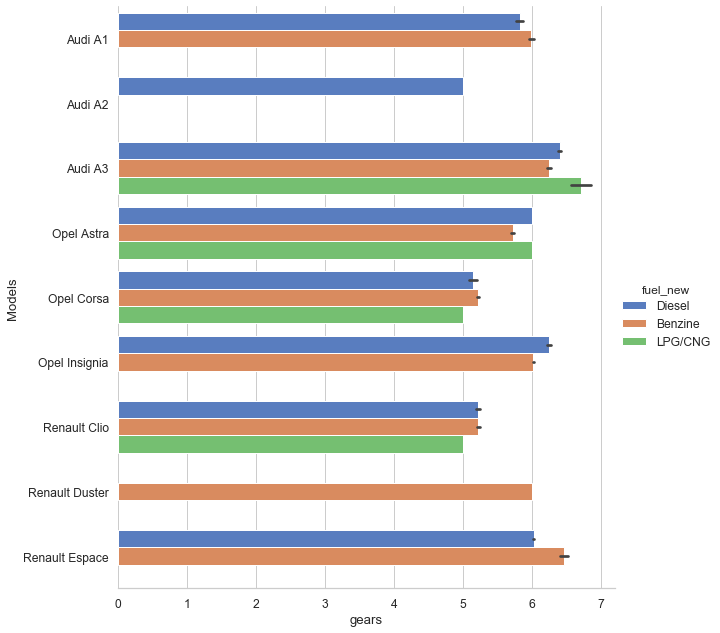

In [137]:
sns.set(style="whitegrid", font_scale = 1.1)

g = sns.catplot(x="gears", y="make_model", hue="fuel_new", data=oto1,
                height=9, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Models")

In [138]:
oto1.isnull().sum()*100/oto1.shape[0]

make_model     0.00
body_type      0.00
price          0.00
vat            0.00
km             0.00
               ... 
register_age   0.00
fuel_new       0.00
nr_doors       0.00
nr_seats       0.00
hp_kw          0.00
Length: 115, dtype: float64

## It seems, the process of "handling with missing values" is done.

In [139]:
miss_val = []

[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]

miss_val

[]

## Re-inspect all features & Re-apply EDA

In [140]:
oto1.corr()

,price,km,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,co2_emission,displacement_cc,register_age,nr_doors,nr_seats,hp_kw
price,1.00,-0.40,0.54,-0.15,0.01,0.08,0.06,0.30,0.42,0.05,0.13,-0.01,0.28,0.01,0.26,0.12,0.33,0.15,0.02,0.27,0.03,0.23,0.31,0.22,0.28,0.14,0.34,0.24,0.38,0.33,0.28,0.34,0.31,-0.02,0.36,0.30,0.19,0.00,0.23,0.16,0.03,0.01,0.01,0.03,-0.08,0.25,0.08,-0.02,-0.08,0.01,0.15,0.03,-0.05,0.20,0.01,0.04,0.01,-0.01,0.04,0.14,0.03,0.02,0.11,0.13,0.16,0.13,0.02,0.02,0.14,-0.02,-0.04,0.25,0.22,0.05,0.38,-0.05,-0.07,0.00,0.09,0.01,0.01,0.34,0.06,-0.05,-0.04,0.06,-0.04,0.12,0.44,0.37,0.07,-0.00,-0.05,0.00,-0.01,0.02,0.06,0.35,0.18,0.29,0.02,0.28,-0.47,0.16,0.25,0.67
km,-0.40,1.00,-0.01,0.14,-0.05,0.01,0.03,0.04,0.02,0.06,0.02,0.02,0.01,-0.06,0.13,-0.07,-0.04,-0.11,-0.09,-0.05,0.03,-0.06,-0.11,0.04,-0.04,-0.04,0.06,0.04,-0.09,-0.07,-0.03,-0.02,-0.06,-0.00,-0.09,-0.08,0.06,0.12,-0.02,0.05,0.06,0.03,0.01,-0.03,0.14,-0.05,-0.09,-0.04,0.08,-0.00,0.02,0.03,-0.05,-0.08,-0.02,-0.08,0.02,0.01,0.16,-0.02,0.02,-0.00,0.06,0.01,-0.01,-0.07,0.18,-0.00,-0.01,0.07,0.00,0.04,0.02,0.12,-0.01,-0.02,0.09,-0.08,0.05,-0.03,-0.10,-0.10,-0.01,0.05,0.11,-0.04,-0.03,-0.04,-0.10,-0.06,0.03,-0.03,-0.02,0.10,-0.04,-0.04,-0.01,-0.03,0.04,-0.30,-0.01,0.31,0.73,0.01,-0.01,0.00
gears,0.54,-0.01,1.00,-0.03,-0.02,0.09,0.03,0.32,0.38,0.06,0.07,0.00,0.16,-0.08,0.17,0.02,0.12,0.06,-0.01,0.12,0.02,0.16,0.22,0.17,0.10,0.14,0.28,0.08,0.31,0.14,0.12,0.25,0.27,-0.03,0.25,0.16,0.15,0.08,0.19,0.07,0.03,0.03,0.01,0.06,0.04,0.08,0.05,0.02,-0.02,0.06,0.10,0.01,-0.04,0.12,0.03,0.01,0.03,0.00,0.10,0.12,0.04,0.01,0.12,0.13,0.15,0.03,0.06,0.01,0.15,0.02,-0.05,0.19,0.17,0.11,0.15,-0.03,0.02,-0.08,0.11,-0.01,-0.07,0.18,0.09,0.01,0.05,0.02,-0.03,0.08,0.22,0.22,0.03,-0.03,0.01,0.07,-0.02,-0.00,0.07,0.16,0.30,-0.04,0.01,0.37,-0.05,0.14,0.09,0.47
previous_owner,-0.15,0.14,-0.03,1.00,0.02,-0.01,0.00,0.02,-0.01,-0.01,-0.04,-0.00,-0.02,0.03,-0.01,-0.01,-0.02,-0.00,0.05,0.05,0.02,0.01,0.00,0.06,-0.01,-0.02,-0.01,0.03,-0.06,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,0.02,-0.01,-0.02,-0.03,

### Correlation with Heatmap

In [141]:
numeric_col = "price,km,gears,co2_emission,previous_owner,consumption_comb,displacement_cc,register_age,hp_kw".split(",")

In [142]:
oto_corr = oto1[numeric_col]

In [143]:
oto_corr

,price,km,gears,co2_emission,previous_owner,consumption_comb,displacement_cc,register_age,hp_kw
0,15770,56013.00,6.00,99.00,2,3.80,1422.00,4.00,66
1,14500,80000.00,7.00,129.00,1,5.60,1798.00,3.00,141
2,14640,83450.00,6.00,99.00,1,3.80,1598.00,4.00,85
3,14500,73000.00,6.00,99.00,1,3.80,1422.00,4.00,66
4,16790,16200.00,6.00,109.00,1,4.10,1422.00,4.00,66
...,...,...,...,...,...,...,...,...,...
15914,39950,934.50,6.00,139.00,1,5.30,1997.00,0.00,147
15915,39885,9900.00,7.00,168.00,1,7.40,1798.00,1.00,165
15916,39875,15.00,6.00,139.00,1,5.30,1997.00,1.00,146
15917,39700,10.00,6.00,139.00,1,5.30,1997.00,1.00,147


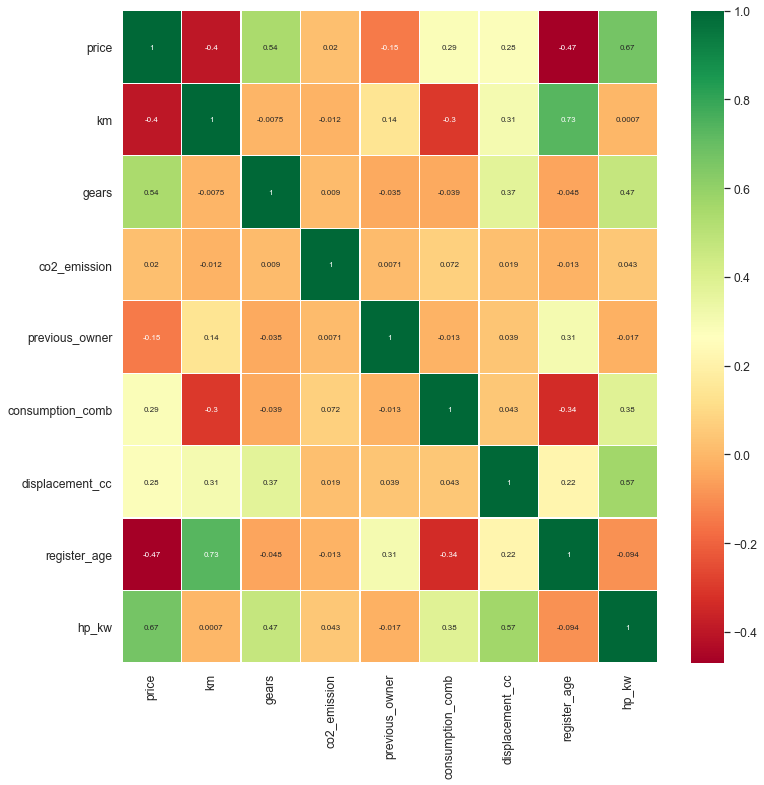

In [144]:
plt.figure(figsize = (12,12))
sns.heatmap(oto_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8})

- We can get from the heatmap that; ``"register_age"`` & ``"km"``, ``"displacement_cc"`` & ``"hp_kw"``, ``"price"`` & ``"hp"`` are correlated. 
- But anyways these columns are considered to have an effect on predicting ``price``.

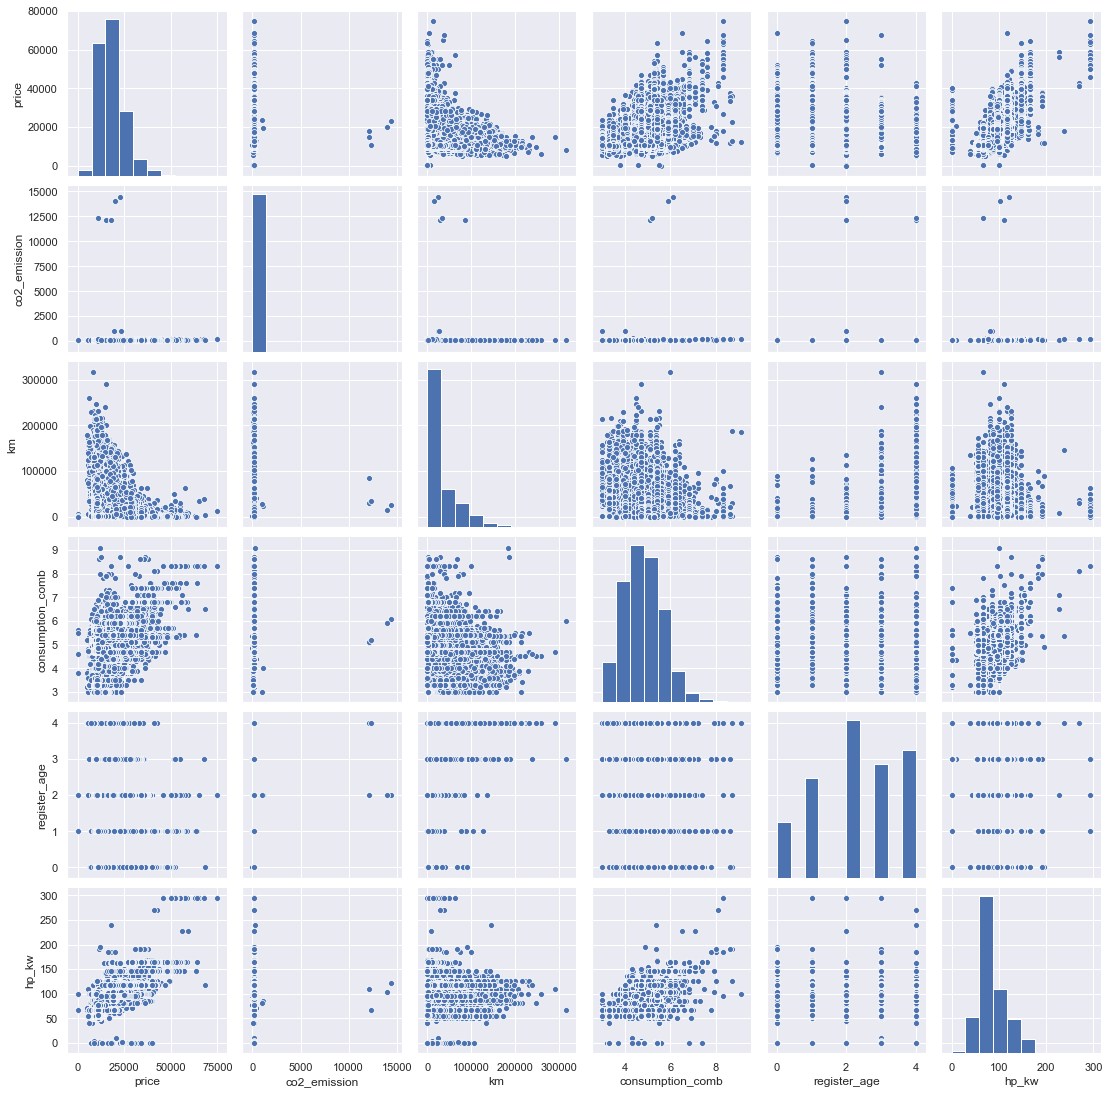

In [145]:
sns.set()

cols=["price", "co2_emission", "km", "consumption_comb", "register_age", "hp_kw"]

sns.pairplot(oto1[cols], size = 2.5)

plt.show()

In [146]:
oto1.co2_emission.describe()

count   15919.00
mean      122.56
std       248.45
min         0.00
25%       106.00
50%       116.00
75%       127.00
max     14457.00
Name: co2_emission, dtype: float64

In [147]:
oto1.drop("co2_emission", axis = 1, inplace = True)

### Let's drop some columns and clean up! We can focus on target column : ``"price"``

### ``"price"``

In [148]:
oto1.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [150]:
oto1.price.sort_values().head(33)

8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
8822     5490
8820     5499
3235     5555
8821     5600
13763    5700
13762    5800
13760    5850
13759    5890
8818     5890
13761    5900
13757    5900
13758    5900
13756    5938
8819     5950
8602     5970
8600     5970
8601     5970
8597     5990
13755    6000
13754    6000
5712     6000
8599     6100
8598     6200
Name: price, dtype: int64

In [151]:
oto1.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

In [152]:
oto1.shape

(15915, 114)

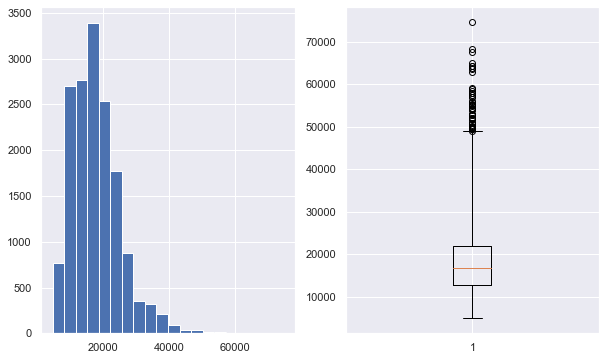

In [153]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(oto1.price, bins=20)

plt.subplot(122)
plt.boxplot(oto1.price, whis=3)

plt.show()

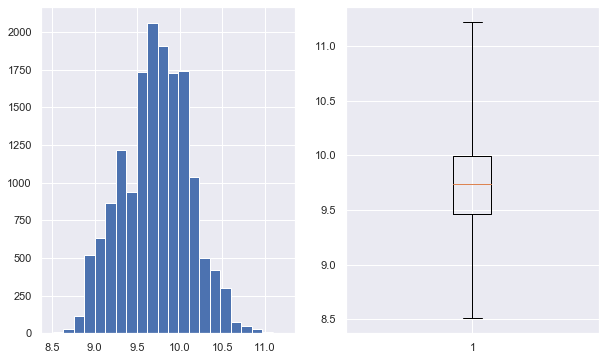

In [154]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(oto1.price), bins=22)

plt.subplot(122)
plt.boxplot(np.log(oto1.price), whis=2.3)

plt.show()

***

### co2 emission

In [ ]:
#--

***

### ``"previous_owner"``

***

### ``"hp_kw"``

In [155]:
oto1.hp_kw.sort_values().head(55)

13633    0
13864    0
11013    0
1269     0
11012    0
10910    0
13566    0
10909    0
8269     0
11163    0
13951    0
10586    0
13570    0
13572    0
13649    0
14048    0
14050    0
14057    0
14894    0
13646    0
13481    0
11183    0
12450    0
13476    0
13474    0
13471    0
13733    0
13422    0
13729    0
13488    0
13397    0
11237    0
2500     0
10167    0
13271    0
13726    0
13198    0
13158    0
4259     0
13144    0
12767    0
7670     0
14896    0
14895    0
14898    0
15261    0
15303    0
15347    0
15435    0
15438    0
15439    0
15461    0
15462    0
15468    0
15472    0
Name: hp_kw, dtype: int64

In [156]:
oto1.hp_kw.unique()

array([ 66, 141,  85,  70,  92, 112,  60,  71,  67, 110,  93, 147,  86,
       140,  87,   0,  81,  82, 135, 132, 100,  96, 162, 150, 294, 228,
       270, 137,   9, 133,  77, 101,  78, 103,   1,  74, 118,  84,  88,
        80,  76, 149,  44,  51,  55,  52,  63,  40,  65,  75, 125, 120,
       184, 239, 121, 143, 191,  89, 195, 127, 122, 154, 155, 104, 123,
       146,  90,  53,  54,  56, 164,   4, 163,  57, 119, 165, 117, 115,
        98, 168, 167], dtype=int64)

In [158]:
oto1.hp_kw.loc[oto1.hp_kw < 40] = np.nan

In [159]:
oto1.hp_kw.isnull().sum()

110

In [160]:
oto1["hp_kw"] = oto1["hp_kw"].fillna(oto1.groupby("make_model")["hp_kw"].transform("median"))

In [161]:
oto1.hp_kw.isnull().sum()

0

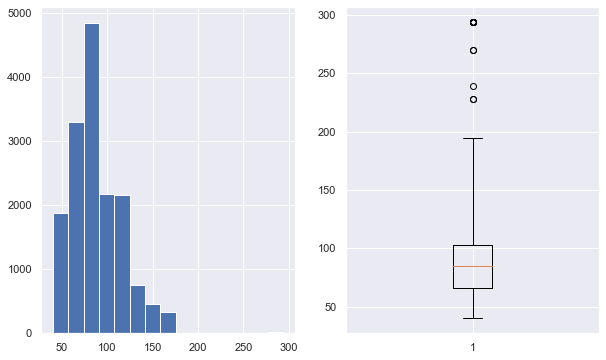

In [162]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(oto1.hp_kw, bins=15)

plt.subplot(122)
plt.boxplot(oto1.hp_kw, whis=2.5)

plt.show()

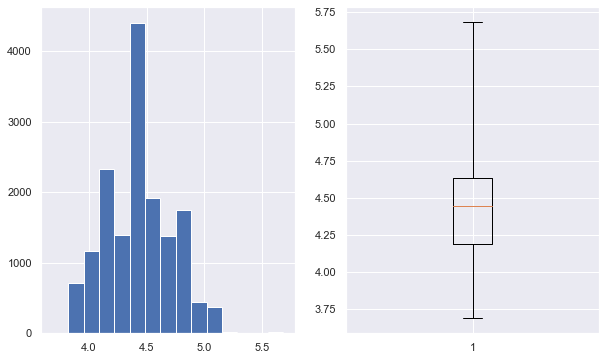

In [163]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(oto1.hp_kw), bins=15)

plt.subplot(122)
plt.boxplot(np.log(oto1.hp_kw), whis=2.5)

plt.show()

In [164]:
oto1.hp_kw.sort_values().head(55)

13759   40.00
8857    40.00
8408    44.00
9781    51.00
9159    51.00
10288   51.00
10289   51.00
10290   51.00
10291   51.00
10292   51.00
9158    51.00
9382    51.00
10294   51.00
10295   51.00
10296   51.00
10297   51.00
10298   51.00
10300   51.00
10301   51.00
10302   51.00
10303   51.00
10304   51.00
10305   51.00
10306   51.00
10287   51.00
10286   51.00
10285   51.00
10284   51.00
9166    51.00
10268   51.00
10269   51.00
9165    51.00
10270   51.00
10271   51.00
9371    51.00
9164    51.00
10272   51.00
10273   51.00
10274   51.00
10275   51.00
10276   51.00
10277   51.00
10278   51.00
10279   51.00
10280   51.00
10281   51.00
10282   51.00
9376    51.00
9161    51.00
9160    51.00
10283   51.00
10307   51.00
9383    51.00
9384    51.00
10308   51.00
Name: hp_kw, dtype: float64

In [165]:
oto1.shape

(15915, 114)

In [166]:
oto1.head()

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,Cloth,6.00,2,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,1422.00,4.00,Diesel,5.00,5.00,66.00
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,Cloth,7.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,1798.00,3.00,Benzine,3.00,4.00,141.00
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,Cloth,6.00,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,1598.00,4.00,Diesel,4.00,4.00,85.00
3,Audi A1,Sedans,14500,VAT deductible,73000.00,Used,Cloth,6.00,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,front,Brown,1422.00,4.00,Diesel,3.00,4.00,66.00
4,Audi A1,Sedans,16790,VAT deductible,16200.00,Used,Cloth,6.00,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.10,Automatic,front,Black,1422.00,4.00,Diesel,5.00,5.00,66.00


In [167]:
oto2 = pd.get_dummies(oto1)

In [168]:
oto2.shape

(15915, 153)

In [169]:
oto2.head()

,price,km,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,displacement_cc,register_age,nr_doors,nr_seats,hp_kw,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,upholstery_Cloth,upholstery_Part/Full Leather,gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,fuel_new_Benzine,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.00,6.00,2,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,1422.00,4.00,5.00,5.00,66.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,14500,80000.00,7.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,1798.00,3.00,3.00,4.00,141.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,14640,83450.00,6.00,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,1598.00,4.00,4.00,4.00,85.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,14500,73000

## End of this Project. Next step will be :
- Runing the Regression ML Model